# Day 4 Lab, IS 4487

This lab is designed specifically to prepare you to complete the project assignment for today. We will go through code (using the MegaTelCo data as an example) that you will be able to adapt for the AdviseInvest project. Here is what you need to be able to do for the project assignment:

1. Identify the target variable for the analysis based on the business problem.
2. Clean the data by removing NAs, and filtering out rows with incorrect values.
3. Identify and recode features that should be categorical (AKA factor) variables.
4.  Compute the mean of a binary variable.

In addition we will do a bit more EDA (if there's time)  on the MegaTelCo data, as preparation for tomorrow's project assignment.

# Load Libraries

In [ ]:
import pandas as pd
import matplotlib as mpl


# Load Data


In [ ]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")


# Tasks

## 1. Clean and Prepare the Data

  **Filter**

Recall that we use square bracket notation with logical conditions to create a boolean mask for filtering:

In [ ]:
mtc_clean = mtc[(mtc['house'] > 0) & (mtc['income'] > 0) & (mtc['handset_price'] < 1000)]

mtc_clean.describe()

**Remove Missing Values**

Does this dataset have an missing values -- NAs? We use the `.isna()` function. (`.isnull()` is also a possibility.) Combined with `.sum()` we can obtain a count of NAs in the dataset. (This is actually another instance of a boolean mask since `is.na()` evalutates as `True`/`False`.  Then `sum()` counts up the number of `True`. This works because Python treats `True` as 1 and `False` as 0.)

In [ ]:
# Identify NAs in a dataset
mtc.isna().sum()


Notice that this method gives a column-wise count.  It appears there are indeed 3 NAs in the `over_15mins_calls_per_month` column. How do we remove them? Use the `.dropna()` function and overwrite the `mtc_clean` data frame with the version from which the NAs have been removed.

In [ ]:
# Remove NAs
mtc_clean = mtc_clean.dropna()


In [ ]:
# check that it worked
mtc_clean.isna().sum()


**Create Categorical Variables**

Which variables represent categories? Let's get an overview of the data again to assist in making that determination.

In [ ]:
mtc_clean.head()

- `college` is currently coded `zero`/`one`.  This should be recoded as 0/1.  We will ignore this for now.
- `reported_satisfaction` is a category.
- `reported_usage_level` is a category.
- `considering_change_of_plan` is a category.
-	`leave` is a category.

We will use the `astype()` function to do the transformation.

In [ ]:
# Convert these to categorical variables
mtc_clean['reported_satisfaction'] = mtc_clean['reported_satisfaction'].astype('category')
mtc_clean['reported_usage_level'] = mtc_clean['reported_usage_level'].astype('category')
mtc_clean['considering_change_of_plan'] = mtc_clean['considering_change_of_plan'].astype('category')
mtc_clean['leave'] = mtc_clean['leave'].astype('category')


In [ ]:
# Check that it worked
mtc_clean.info()

Perfect!

## 3. Identify the target

The target variable is the data representation of the phenomenon, we are interested in predicting or explaining. In this case, customers are churning. This represents a problem for the business, something we would like to improve. Hence the churn variable, `leave`, will be the target.

The target variable will always depend on the specific business context in which the analysis is taking place.


## 4. Compute the mean of a binary variable  

What is the proportion of people who churned? There are lots of ways of answering this question.  But here is a straightforward approach based on the idea of (again) using a boolean mask.  `leave` is categorical (`LEAVE`/`STAY`) but we can make it into `True`/`False` in order to compute the mean.

Remember that a *proportion* is a number between 0 and 1, while a *percentage* is a number between 0 and 100.



In [ ]:
# Here is the mask
mtc_clean['leave'] == "LEAVE"

Take the mean of the series to get the proportion of leavers.  This works, again, because Python treats `True` as 1 and `False` as 0.

Here's an example:

In [ ]:
series = pd.Series([True, False, True, False, True]) # 3/5 True = .6 or 60%
series


In [ ]:
series.mean()*100 # should be 60%

## Your Turn: Compute the mean of a binary series

1. Create a short Pandas series consisting in 0s and 1s.
2. Calculate the proportion of 1s.

In [ ]:
# Write your code here


##Your Turn: Compute the proportion of MegaTelCo customers who churned

In [ ]:
# Write your code here


# Explore Relationships

###How does College affect leaving?

In [ ]:
#Bar chart with counts
mtc_clean[['college','leave']].groupby('leave').count().plot(kind = "bar")

In [ ]:
#Bar chart with percentage
college_summary = mtc_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100

college_summary.plot.bar()

### How does phone price affect leaving?

A boxplot is a good choice because we are comparing a categorical variable and a numeric variable.

In [ ]:
#Boxplot
mtc_clean.plot(kind = "box", column = "handset_price", by = "leave")

### How does income affect leaving?

income    Axes(0.125,0.11;0.775x0.77)
dtype: object

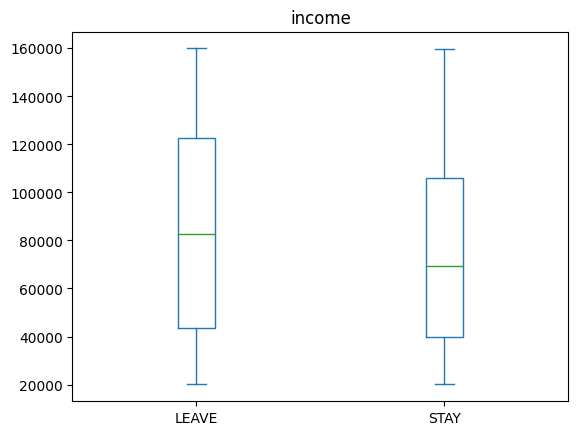

In [ ]:
# Again, boxplot
mtc_clean.plot(kind = "box", column = "income", by = "leave")
